Deep learning re-uses simple mathematical concepts over and over. These are: tensors, tensor operations, differentiation, gradient descent, etc.

In [1]:
import keras
from keras.datasets import mnist

#training images and labels form the training set
#test images and labels form the test set

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
#inputs are made of 60k 28x28 images

print(X_train.shape)
print(X_train.dtype)

(60000, 28, 28)
uint8


In [3]:
#training labels are the digit corresponding to the label

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
from keras import models
from keras import layers

#create a sequential model which can be .add'ed to
#dense layer with 28*28=784 inputs and 512 outputs
#second dense layer with 512 inputs and 10 outputs

#dense layers extract representations out of the data fed into them

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [5]:
#we also need to add three more things:
# a loss function (measures performance of the network)
# optimizer (mechanism through which the network updates the parameters)
# metrics (what we measure during training)

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [6]:
#we also need to want to reshape the data into the form the network wants
#and also scale the values so they're between 0 and 1

X_train = X_train.reshape((60000, 28*28))
X_train = X_train / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test / 255

#note, originally data is uint8, 
#but python 3 does float divison
#and converts it to float32

print(X_train.dtype)
print(X_test.dtype)

float64
float64


In [7]:
#also need to change the data so it's "categorical"
# i.e. one-hot representation

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
#now to actually train the network which we do with .fit

network.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 6s - loss: 0.2533 - acc: 0.9268     
Epoch 2/5
60000/60000 [==============================] - 7s - loss: 0.1038 - acc: 0.9695     
Epoch 3/5
60000/60000 [==============================] - 6s - loss: 0.0687 - acc: 0.9793     
Epoch 4/5
60000/60000 [==============================] - 6s - loss: 0.0507 - acc: 0.9846     
Epoch 5/5
60000/60000 [==============================] - 6s - loss: 0.0377 - acc: 0.9886     


In [9]:
#can verify the model also performs well on the test set
# i.e how well it generalizes to unseen examples

#the accuracy is less than the training accuracy due to overfitting

test_loss, test_acc = network.evaluate(X_test, y_test)
print('test_acc:',test_acc)

 9344/10000 [===========================>..] - ETA: 0stest_acc: 0.9793


In [10]:
#data is stored in multidimensional numpy arrays (tensors)
#matrices are 2D tensors
#tensors are a generalization of matrices for any number of dimensions

#a tensor with only one number is a scalar
#also known as a 0-dimensional tensor

import numpy as np

x = np.array(12)
print("x:",x)
print("x.ndim:",x.ndim)

x: 12
x.ndim: 0


In [11]:
#an array of numbers is a vector
#also known as a 1-dimensional tensor

x = np.array([1,2,3,4,5])
print("x:",x)
print("x.ndim:",x.ndim)

#this is a 5-dimensional vector, not a 5-dimensional tensor!
#a 5D vector only has 1 axis (aka dimension)

x: [1 2 3 4 5]
x.ndim: 1


In [12]:
#an array of vectors is a matrix
#also known as 2D tensor

x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
print("x:",x)
print("x.ndim:",x.ndim)

#the first axis is the rows, i.e. [1,2,3] is the first row
#the second axis is the columns, i.e. [1,4,7] is the first column

x: [[1 2 3]
 [4 5 6]
 [7 8 9]]
x.ndim: 2


In [13]:
#if you have an array of matrices, you have a 3D tensor
#can visualize as a cube

x = np.array([[[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]], 
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]], 
              [[5, 78, 2, 34, 0], 
               [6, 79, 3, 35, 1], 
               [7, 80, 4, 36, 2]]])
print("x:",x)
print("x.ndim:",x.ndim)

x: [[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]]
x.ndim: 3


In [14]:
#an array of 3D tensors is a 4D tensor, etc.

#tensors have three attributes
# - axes (rank) - a matrix has 2 axes, a 3D tensor has 3.
# - shape - a tuple of integers which says how many dimensions the tensor has along each axis
# - data type - type of data contained in the tensor

from keras.datasets import mnist 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

#i.e. X_train has 3 axes aka 3D tensor (examples, height, width),
#     a shape of (60k, 28, 28)
#     data type of 'float32'

3
(60000, 28, 28)
uint8


In [15]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [16]:
#you can slice tensors like:

my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [17]:
#can also select how to slice into the actual image itself

#train_images[10:100] == train_images[10:100,:,:]
#train_images[10:100] == train_images[10:100,0:28,0:28]

In [18]:
#this gets the bottom right 14x14 pixels of all images

my_slice = train_images[:,14:,14:]
my_slice.shape

(60000, 14, 14)

In [19]:
#can use negative slicing
#will slice relative to end of that axis
#this gets the middle 14 pixels

my_slice = train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

In [20]:
#the first axis always contains the data tensor
#in deep learning we don't process the entire dataset at once
#we split the data into batches, usually 32, 64, 128, etc.

batch = train_images[:128] #gets 128 images
next_batch = train_images[128:256] #gets next 128 images

n = 5

#in general, to get the nth batch
nth_batch = train_images[128*n:128*(n+1)]

In [21]:
#in general, data tensors have the form of:
# vector data = (samples, features)
# sequential data = (samples, timesteps, features)
# images = (samples, channels, height, width)
# video = (samples, frames, channels, height, width)

#MNIST is an example of images, but with only 1 channel

In [22]:
# deep learning can be done by repeated usage of a handful
# of tensor operations, for example

# Dense(512, activation='relu') 
# is the same as
# relu(dot(W, input) + b)

#that is, a dot product between the input tensor and W
#the addition between that 2D tensor and a vector, b
#the relu operation, i.e. relu(x) = max(x, 0)

#relu is an elementwise operation, i.e. independent of other elements
#a naive relu implenentation is:

def naive_relu(x):
    assert len(x.shape) == 2 #assert is 2D tensor
    
    x = x.copy() #don't overwrite input tensor
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
    return x

x = np.array([[-1,2,-3],
              [4,-5,6]])
print(naive_relu(x))

[[0 2 0]
 [4 0 6]]


In [23]:
#can do the same for addition

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

y = np.array([[1,-2,3],
              [-4,5,-6]])
print(naive_add(x, y))

[[0 0 0]
 [0 0 0]]


In [24]:
#however, numpy has built in highly optimized implementations
#of these in BLAS (basic linear algebra subprograms)

z = x + y
print(z)

[[0 0 0]
 [0 0 0]]


In [25]:
#to get 10 features in the input to go to 100 features in the hidden layer
#you have 10 neurons, each connected to 100 neurons
#therefore you have 1000 weights and 100 biases

#the dot product will be between [100 x 10] @ [10 x 1]
#the nth row of the [100 x 10] tensor will be the weights
#between all 10 input nodes and the nth output node 
#giving you a [100 x 1] tensor


x = np.random.random((10,))
W = np.random.random((100,10))
b = np.random.random((100,))

out = (np.dot(W, x) + b)
print(out.shape)

(100,)


In [26]:
#naive_add only supports operation between two 2D tensors
#with identical shapes

#what happens when they're different?
#if there's no ambiguity, we get the smaller tensor broadcasted
#to match the shape of the larger tensor

#broadcasting has two steps:
#1. axes are added to the smaller tensor to match the ndim of the larger
#2. the smaller tensor is repeated along these new axis

#example: X = (32, 10), y = (10,)
#repeat y for 32 times along the 0 axis to make y = (32,10)

#we can make a naive implementation

def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

#in general, if one tensor has shape (a,b,..,n,n+1,..,m)
# and the other has shape (n,n+1,..,m)

#then broadcasting happens over axes a through n-1

#x = (64, 3, 32, 10)
#y = (32, 10)

#y gets broadcasted to (64, 3, 32, 10)

In [27]:
#dot product is the most common and useful tensor operation

def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0 
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])

print(naive_vector_dot(x,y))

#the dot product between two vectors is a scalar
#only vectors with same number of elements can be dot producted

55


In [28]:
#can also take the dot product between a matrix and vector

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

x = np.array([[1,2,3],
              [4,5,6]])
y = np.array([1,2,3])

print(naive_matrix_vector_dot(x, y))

[ 14.  32.]


In [29]:
#you can also re-use the previous function
#which highlights the relationship between a matrix-vector
#product and a vector product

def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:], y)
    return z

print(naive_matrix_vector_dot(x, y))

[ 14.  32.]


In [30]:
#note that dot(x, y) is not the same as dot(y, x)!!!
#can only do dot(x, y) if x.shape[1] == y.shape[0]
#result is a matrix with shape (x.shape[0], y.shape[1])
#the values are the vector products between rows of x and columns of y

def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            column_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x, column_y)
    return z

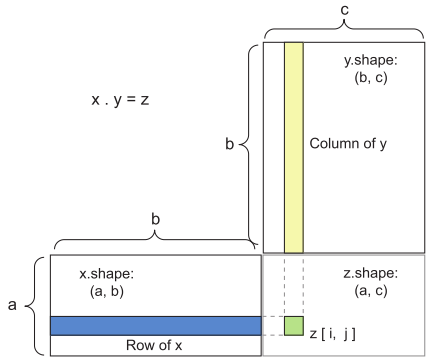

In [31]:
#another type of tensor operation is reshaping

x = np.array([[0,1],
              [2,3],
              [4,5]])

print(x)

x = x.reshape((6,1))

print(x)

x = x.reshape((2,3))

print(x)

[[0 1]
 [2 3]
 [4 5]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
[[0 1 2]
 [3 4 5]]


In [32]:
#a common transformation is transposing
#this means exchanging all rows with all columns
#i.e. x[i,:] becomes x[:,i]

x = np.array([[1,2,3],
              [4,5,6]])

print(x)

x = np.transpose(x)

print(x)

[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]


In [33]:
#as the contents of tensors can be interpreted as points
#in a geometric spare, all tensor operations have a geometric
#interpretation

#i.e. adding two tensors is just chaining them together

#therefore neural networks are a sequence of complex geometric
#transformations in high dimensional space

#consider two classes in 3D, one surrounding the other
#one is a sphere and the other is inside the sphere
#to make these two linearly separable we need to "unfold"
#the sphere by doing transformations in 3D space

#deep learning is all about finding good representations
#for complicated data manifolds

In [51]:
# consider: output = relu(dot(W, input) + b)
# W and b are the trainable parameters

# the parameters are initialized randomly, which obviously doesn't
# grant any meaningful representations
# we want to gradually adjust the weights based on feedback

# we have a training (feedback) loop which does:
# 1. get a batch of training examples and labels
# 2. do the forward pass to get predicted labels
# 3. compute loss w.r.t. true labels and predicted labels
# 4. update all the parameters of the network to reduce the loss on this batch

# step 4 is the hard bit, how do you update the parameters?
# all operations in the network are differentiable
# can compute gradient of loss w.r.t. parameters
# then change the parameters in opposite direction of gradient
# this decreases the loss

In [ ]:
#continuous functions map f(x) to y
#with a continuous function, a small change in x will make
#a small change in y
# f(x + epsilon_x) = y + epsilon_y

#as f(x) is smooth, when epsilon_x is small, at a point p
#we can approximate f as a linear slope, a, therefore:
# epsilon_y = a * epsilon_x

#this slope is only valid at that point p
#the slope of a is called the derivative of f at point p
#if a is negative, a small change of x around p decreases f(x)
#if a is positive, a small change of x around p increases f(x)
#(change means increase here)
#the absolute value of a (the magnitude of the derivative) tells
#you how "quickly" the inc/decrease will be (i.e. by how much)

#for every differentiable function f(x) there is a derivative
#function, f'(x) which maps values of x to their gradient at x

#if you want to reduce f(x) and have the derivative,
#just change x in the opposite direction of the deriv 

#i.e. below, the deriv is negative so increase x by a 
# positive amount

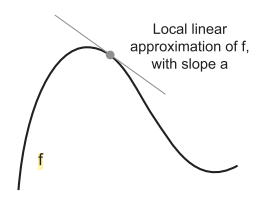

In [52]:
#a gradient is a generalization of the concept of derivatives
#to functions with multidimensional inputs

#consider a NN:
# y_pred = dot(W, x)
# loss = loss_fn(y_pred, y)

# this can be considered a mapping of: loss = f(W)
# the derivative of f at point W_0 (initial weights) is a 
# tensor gradient(f)(W_0), this is same shape as W_0 where 
# each value [i,j] indicates the direction and magnitude of
# the loss when changing W_0[i,j]

#gradient(f)(W_0), that is the gradient of function f at point
#W_0, can be interpreted as a tensor describing the "curvature" 
#of f(W) around point W_0

#now we reduce the loss, f(W_0), by moving W_0 in the opposite
#direction of the gradient, i.e. W_1 = W_0 - gradient(f)(W_0)

In [53]:
#you can find the minimum of a function analytically
#the minimum is a point where the derivative is 0
#so all you need to do is find this point

#neural networks find a combination of parameters which
#have the smallest possible loss, this can be done by solving
#gradient(f)(W) = 0 for W
#solving this is intractable when the number of parameters 
#is as large as modern neural networks (tens of millions) 

#instead you use the 4 step training loop algorithm changed a bit
#modify parameters a little bit based on the current loss 
#calculated on a random batch of data

#1. get batch of samples and labels
#2. forward pass to get predictions
#3. compute loss on batch between predictions and labels
#4. compute gradient of loss wrt parameters (backward pass)
#5. update parameters in the opposite direction of gradient

#this is called stochastic mini-batch gradient descent
#as the batch is sampled randomly from the dataset

#true SGD apparently means sampling 1 data point at a time
#batch SGD apparently means the batch is the entire dataset

#other algorithms like RMSprop, Adam, etc. available

#consider momentum, which helps with convergence speed and 
#local minima
#consider a ball rolling down a hill, don't want it stuck
#in local minimum, we want it to have enough momentum to roll
#out of shallow minimum
#momentum uses current acceleration (current slope value)
#as well as current velocity (from past acceleration)

In [ ]:
#in practice, we chain together many tensor operations each
#with their own simple derivative

#i.e. f(W_1, W_2, W_3) = a(W_1, b(W_2, c(W_3)))

#calculus tells us that a chain of functions can be derived 
#using the chain rule, i.e. the deriv of f(g(x)) is 
#f'(g(x)) * g'(x)

#applying the chain rule to neural networks gives you
#the backpropagation algorithm
#this starts with the final loss value and works backwards
#from there towards the input, one layer at a time

In [55]:
#back to the Keras example

#load input images and labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#reshape to (60k, 784)
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images / 255

test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#network is a chain of 2 dense layers
#each layer is f(dot(W, x) + b) w/ f = activation function
network = models.Sequential() 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,))) 
network.add(layers.Dense(10, activation='softmax'))

#categorical cross entropy is the loss function
#loss minimized via mini-batch SGD
#optimized via RMSprop
network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

#this defines the training loop
#5 epochs = 5 passes through entire training data
#mini-batches of 128 means we perform 469 batches per epoch
#total of 2345 weight updates in total
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 7s - loss: 0.2556 - acc: 0.9259     
Epoch 2/5
60000/60000 [==============================] - 6s - loss: 0.1054 - acc: 0.9693     
Epoch 3/5
60000/60000 [==============================] - 6s - loss: 0.0693 - acc: 0.9786     
Epoch 4/5
60000/60000 [==============================] - 6s - loss: 0.0506 - acc: 0.9848     
Epoch 5/5
60000/60000 [==============================] - 6s - loss: 0.0380 - acc: 0.9887     
